In [14]:
%config InlineBackend.figure_format="retina"
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (14, 8)

In [1]:
from backtester.datahandler import HistoricalOptionsData
from backtester.strategy import Strategy, StrategyLeg
from backtester.option import Type, Direction
from backtester import Backtest

In [2]:
data = HistoricalOptionsData("data/options_data_v2.h5",
                             key="/SPX")
schema = data.schema

In [3]:
schema

Schema([Field(name='underlying', mapping='underlying'), Field(name='underlying_last', mapping='underlying_last'), Field(name='date', mapping='quotedate'), Field(name='contract', mapping='optionroot'), Field(name='type', mapping='type'), Field(name='expiration', mapping='expiration'), Field(name='strike', mapping='strike'), Field(name='bid', mapping='bid'), Field(name='ask', mapping='ask'), Field(name='volume', mapping='volume'), Field(name='open_interest', mapping='openinterest'), Field(name='last', mapping='last'), Field(name='impliedvol', mapping='impliedvol'), Field(name='delta', mapping='delta'), Field(name='gamma', mapping='gamma'), Field(name='theta', mapping='theta'), Field(name='vega', mapping='vega'), Field(name='dte', mapping='dte')])

In [4]:
strat = Strategy(schema)
strat

Strategy(legs=[])

We'll implement a simple [short straddle](https://www.optionseducation.org/strategies/all-strategies/short-straddle), selling calls and puts 10% otm between 30 and 20 days prior to expiration, and covering the position 2 days before expiration.

In [5]:
leg1 = StrategyLeg(schema, option_type=Type.CALL, direction=Direction.SELL)
leg1.entry_filter = (schema.underlying == "SPX") & (
    schema.strike >= 1.1 * schema.underlying_last) & (schema.dte >=
                                                      20) & (schema.dte <= 30)
leg1.exit_filter = (schema.underlying == "SPX") & (schema.dte <= 2)

leg2 = StrategyLeg(schema, option_type=Type.PUT, direction=Direction.SELL)
leg2.entry_filter = (schema.underlying == "SPX") & (
    schema.strike <= schema.underlying_last * 0.9) & (schema.dte >=
                                                      20) & (schema.dte <= 30)
leg2.exit_filter = (schema.underlying == "SPX") & (schema.dte <= 2)
strat.add_leg(leg1)
strat.add_leg(leg2)

Strategy(legs=[StrategyLeg(type=Type.CALL, direction=Direction.SELL, entry_filter=Filter(query='(type == 'call') & ((((underlying == 'SPX') & (strike >= 1.1 * underlying_last)) & (dte >= 20)) & (dte <= 30))'), exit_filter=Filter(query='(type == 'call') & ((underlying == 'SPX') & (dte <= 2))')), StrategyLeg(type=Type.PUT, direction=Direction.SELL, entry_filter=Filter(query='(type == 'put') & ((((underlying == 'SPX') & (strike <= underlying_last * 0.9)) & (dte >= 20)) & (dte <= 30))'), exit_filter=Filter(query='(type == 'put') & ((underlying == 'SPX') & (dte <= 2))'))])

In [6]:
bt = Backtest()
bt.strategy = strat
bt.data = data
bt

Backtest(capital=Strategy(legs=[StrategyLeg(type=Type.CALL, direction=Direction.SELL, entry_filter=Filter(query='(type == 'call') & ((((underlying == 'SPX') & (strike >= 1.1 * underlying_last)) & (dte >= 20)) & (dte <= 30))'), exit_filter=Filter(query='(type == 'call') & ((underlying == 'SPX') & (dte <= 2))')), StrategyLeg(type=Type.PUT, direction=Direction.SELL, entry_filter=Filter(query='(type == 'put') & ((((underlying == 'SPX') & (strike <= underlying_last * 0.9)) & (dte >= 20)) & (dte <= 30))'), exit_filter=Filter(query='(type == 'put') & ((underlying == 'SPX') & (dte <= 2))'))]), strategy=1000000)

In [7]:
bt.run()

/Users/jamoroso/work/backtester_options/backtester/strategy/strategy.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  entry_df.legs = exit_df.legs = exit_df.columns.levels[0]


,date,contract,order,qty,profit,capital
0,1990-01-19,SPX900217C00375000,STO,1,10.0,1000010.0
1,1990-01-19,SPX900217P00225000,STO,1,10.0,1000020.0
2,1990-01-22,SPX900217C00365000,STO,1,10.0,1000030.0
3,1990-01-22,SPX900217P00225000,STO,1,10.0,1000040.0
4,1990-01-23,SPX900217C00365000,STO,1,10.0,1000050.0
5,1990-01-23,SPX900217P00225000,STO,1,10.0,1000060.0
6,1990-01-24,SPX900217C00365000,STO,1,10.0,1000070.0
7,1990-01-24,SPX900217P00225000,STO,1,10.0,1000080.0
8,1990-01-25,SPX900217C00360000,STO,1,10.0,1000090.0
9,1990-01-25,SPX900217P00225000,STO,1,10.0,1000100.0


In [8]:
bt.trade_log["order"].value_counts()

STO    2798
BTC    1728
Name: order, dtype: int64

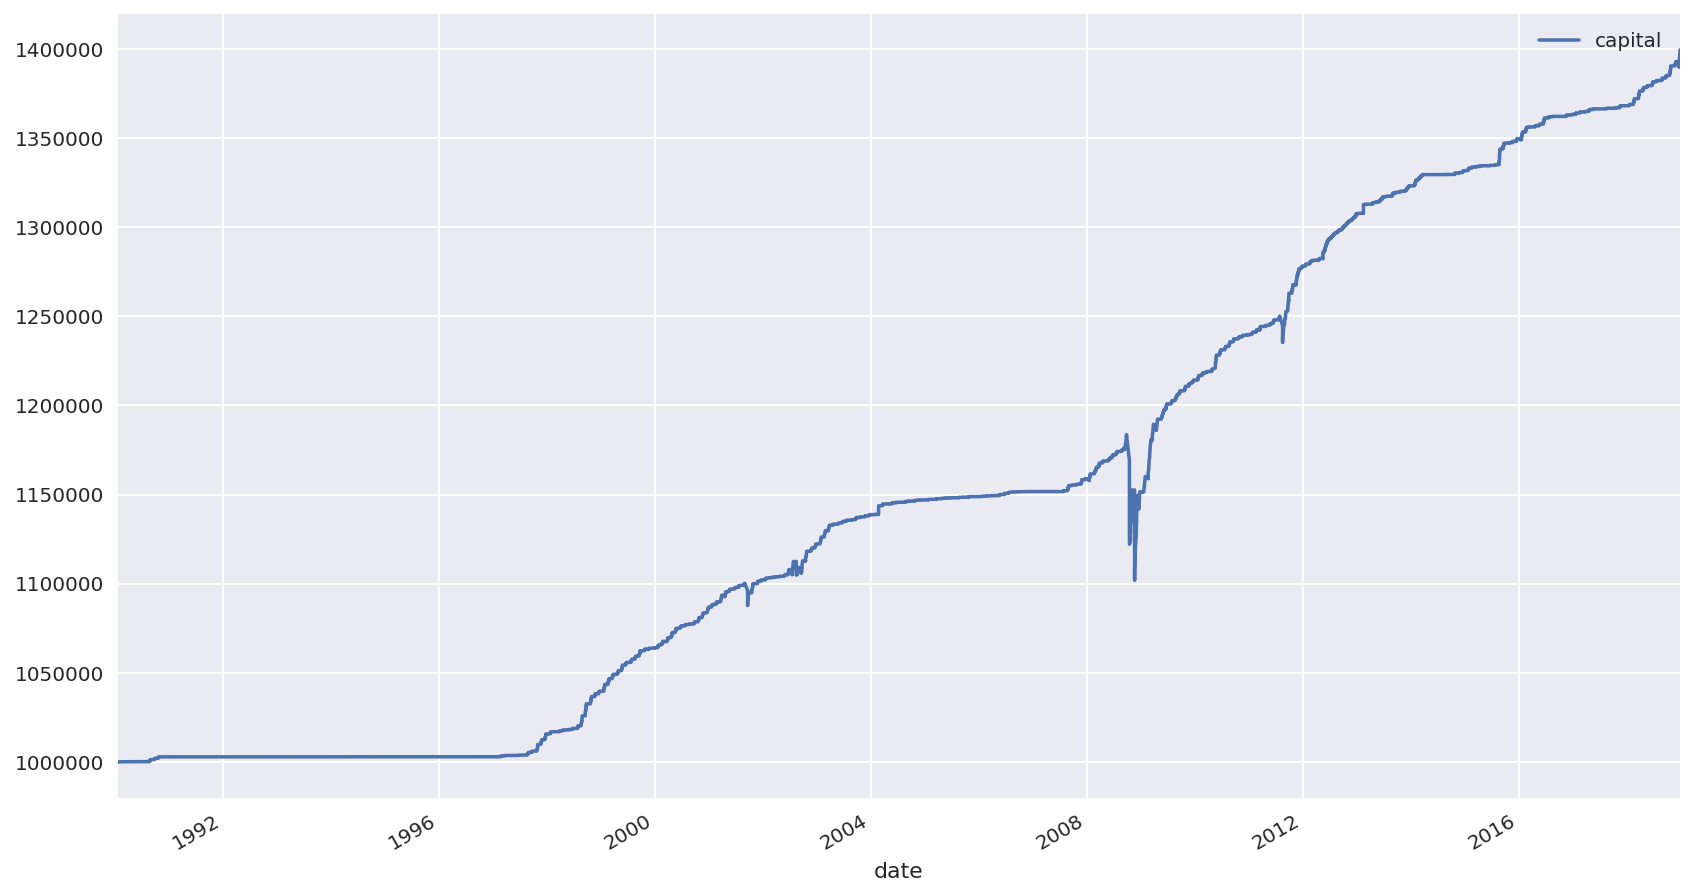

In [15]:
bt.trade_log.plot(x="date", y="capital")